# Importing Libraries

In [332]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt


# Analysis of Target Column 'GDP' Before Supervised Learning

In [343]:
economic_data=pd.read_csv('../../data/war_economic_data.csv')
economic_data=economic_data[:-1]
economic_data.drop('Unnamed: 0',axis=1,inplace=True)
economic_data.set_index('Quarter', inplace=True)
economic_data.columns = economic_data.columns.str.strip()
for col in economic_data.columns:
    if economic_data[col].dtype == 'object':
        economic_data[col] = pd.to_numeric(economic_data[col], errors='coerce')
#Imputing missing values
economic_data.bfill(axis=0, inplace=True)
economic_data.ffill(axis=0, inplace=True)
economic_data.head()

,Consumer Price Index,UNRATE,Personal Savings,Inflation Rate,Gross Domestic Product,Personal Consumption Expenditures,Gross Savings,Gross saving as a percentage of gross national income,Gross domestic investment,Net saving as a percentage of gross national income,FEDFUNDS
Quarter,,,,,,,,,,,
1947-03-31,21.633333,3.733333,12.595,18.866667,243.164,156.2,47.1,19.6,40.8,7.9,1.03
1947-06-30,21.933333,3.733333,8.476,18.333333,245.968,160.0,46.7,19.1,39.6,7.4,1.03
1947-09-30,22.566667,3.733333,12.635,12.066667,249.585,163.5,49.1,19.7,41.0,7.9,1.03
1947-12-31,23.166667,3.733333,10.372,9.300000,259.745,167.7,54.0,21.0,49.8,9.3,1.03
1948-03-31,23.533333,3.733333,12.763,8.766667,265.742,170.4,59.0,22.1,54.7,10.6,1.03


### Autocorrelation Plot to understand how timeseries are related to one another

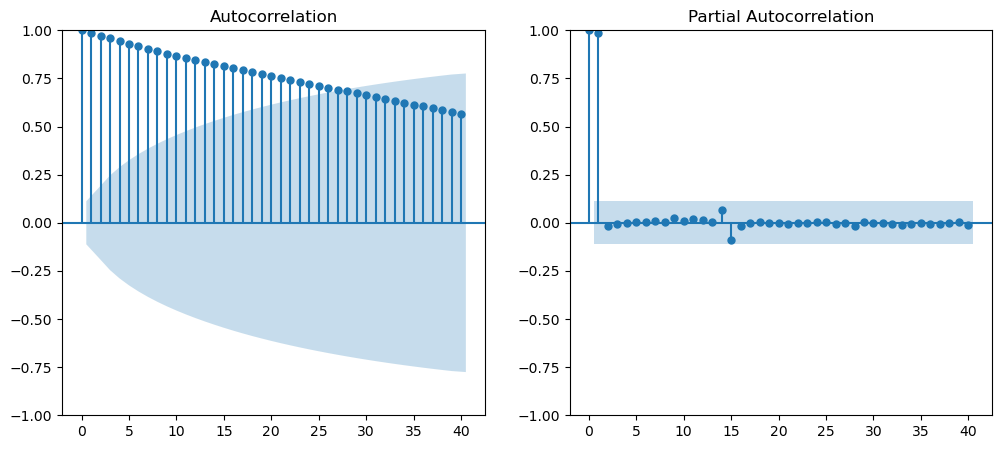

In [338]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# Plotting ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF plot
sm.graphics.tsa.plot_acf(economic_data['Gross Domestic Product'], lags=40, ax=axes[0])

# PACF plot
sm.graphics.tsa.plot_pacf(economic_data['Gross Domestic Product'], lags=40, ax=axes[1])

plt.show()

### Checking for Stationarity

In [339]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(economic_data['Gross Domestic Product'])

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation
if result[1] < 0.05:
    print("The series is likely stationary.")
else:
    print("The series is likely non-stationary.")


ADF Statistic: 8.099528374671129
p-value: 1.0
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572
The series is likely non-stationary.


In [344]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    
    # Determining if the series is stationary or non-stationary
    if result[1] < 0.05:
        print("Conclusion: The series is likely stationary.")
    else:
        print("Conclusion: The series is likely non-stationary.")
    print('--------------------------------------')

# First order differencing
first_diff = economic_data['Gross Domestic Product'].diff().dropna()
print("First Order Differencing ADF Test:")
adf_test(first_diff)

# Second order differencing
second_diff = first_diff.diff().dropna()
print("Second Order Differencing ADF Test:")
adf_test(second_diff)



First Order Differencing ADF Test:
ADF Statistic: 0.3155755090079204
p-value: 0.9780479042699838
Critical Value 1%: -3.4529449243622383
Critical Value 5%: -2.871489553425686
Critical Value 10%: -2.572071437887033
Conclusion: The series is likely non-stationary.
--------------------------------------
Second Order Differencing ADF Test:
ADF Statistic: -7.8934325539589265
p-value: 4.374390839755171e-12
Critical Value 1%: -3.4529449243622383
Critical Value 5%: -2.871489553425686
Critical Value 10%: -2.572071437887033
Conclusion: The series is likely stationary.
--------------------------------------


### Trend-Seaonality Analysis

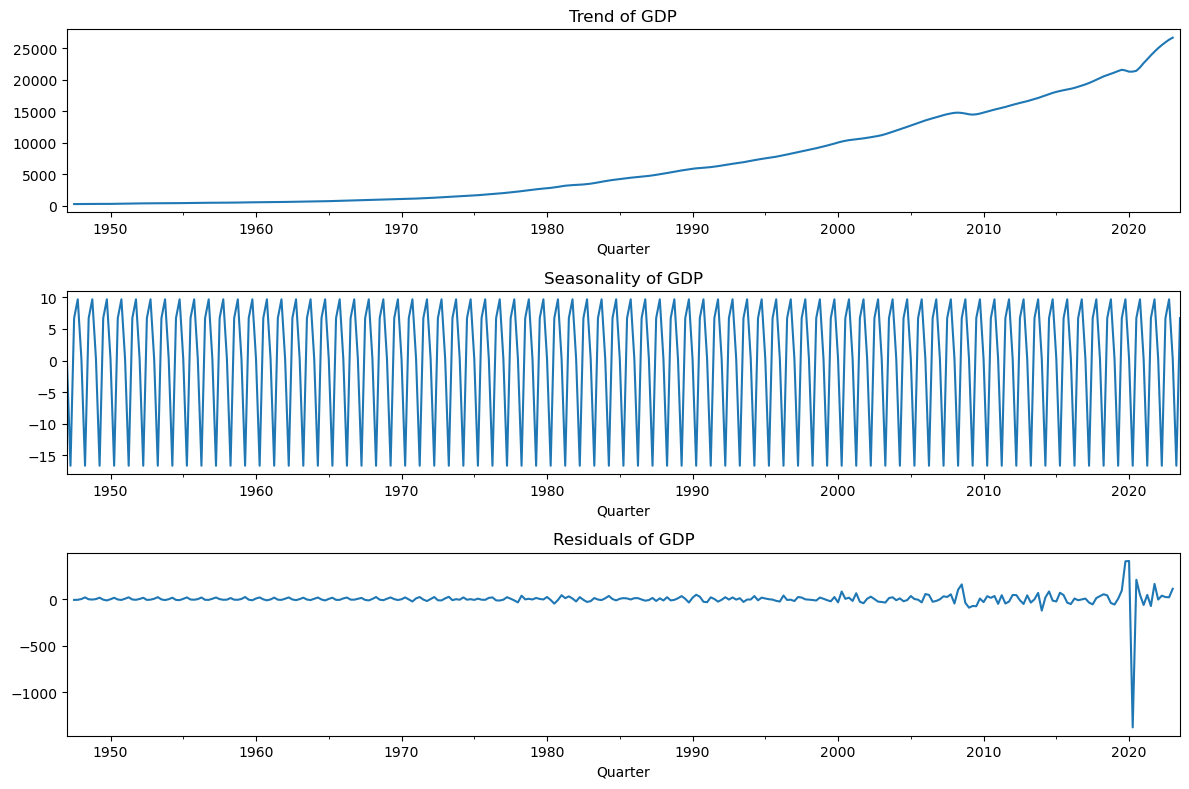

In [342]:

economic_data.index = pd.to_datetime(economic_data.index)
decomposition = sm.tsa.seasonal_decompose(economic_data['Gross Domestic Product'].dropna(), model='additive', period=4)
# Plotting the decomposed time series
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend of GDP')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality of GDP')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals of GDP')
plt.tight_layout()
plt.show()

# Code Modularization

### Preprocess of dataframe

In [296]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(df):
    df.drop('Unnamed: 0',axis=1,inplace=True)
    df.set_index('Quarter', inplace=True)
    df.columns = df.columns.str.strip()
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col], errors='coerce')
    # set reference point as 1983-09-30
    reference = {
        'Consumer Price Index': 100.266667,
        'UNRATE': 100,
        'Personal Savings': 252.838,
        'Inflation Rate':100,
        'Gross Domestic Product': 3689.179,
        'Personal Consumption Expenditures': 2319.9,
        'Gross Savings': 771.1,
        'Gross saving as a percentage of gross national income': 100,
        'Gross domestic investment': 771.1,
        'Net saving as a percentage of gross national income': 100,
        'FEDFUNDS': 100
    }

    # for column, divisor in reference.items():
    #     if column in df.columns:
    #         df[column] = pd.to_numeric(df[column], errors='coerce')
    #         df[column] /= divisor
    #     else:
    #         print(f"Column {column} not found in DataFrame")

    # Select numeric columns for scaling
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Apply StandardScaler
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    #Imputing missing values
    df.bfill(axis=0, inplace=True)
    df.ffill(axis=0, inplace=True)
    
    return df
    


In [297]:
economic_war_data=pd.read_csv('../../data/war_economic_data.csv')
economic_war_data=economic_war_data[:-1]
economic_data_scaled=preprocess_data(economic_war_data)
economic_data_scaled.head()

,Consumer Price Index,UNRATE,Personal Savings,Inflation Rate,Gross Domestic Product,Personal Consumption Expenditures,Gross Savings,Gross saving as a percentage of gross national income,Gross domestic investment,Net saving as a percentage of gross national income,FEDFUNDS
Quarter,,,,,,,,,,,
1947-03-31,-1.148607,-1.165014,-0.734764,4.786619,-0.940068,-0.916787,-0.971791,-0.307544,-0.962274,0.407082,-0.998466
1947-06-30,-1.145046,-1.165014,-0.743590,4.618460,-0.939680,-0.916021,-0.972099,-0.507860,-0.963050,0.277970,-0.998466
1947-09-30,-1.137529,-1.165014,-0.734678,2.642587,-0.939178,-0.915317,-0.970253,-0.267481,-0.962145,0.407082,-0.998466
1947-12-31,-1.130407,-1.165014,-0.739527,1.770261,-0.937770,-0.914471,-0.966483,0.253341,-0.956458,0.768596,-0.998466
1948-03-31,-1.126055,-1.165014,-0.734404,1.602101,-0.936939,-0.913927,-0.962636,0.694036,-0.953291,1.104287,-0.998466


In [278]:
economic_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 1947-03-31 to 2023-09-30
Data columns (total 11 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Consumer Price Index                                   307 non-null    float64
 1   UNRATE                                                 307 non-null    float64
 2   Personal Savings                                       307 non-null    float64
 3   Inflation Rate                                         307 non-null    float64
 4   Gross Domestic Product                                 307 non-null    float64
 5   Personal Consumption Expenditures                      307 non-null    float64
 6   Gross Savings                                          307 non-null    float64
 7   Gross saving as a percentage of gross national income  307 non-null    float64
 8   Gross domestic investment              

In [279]:
economic_data.isnull().sum()

Consumer Price Index                                     0
UNRATE                                                   0
Personal Savings                                         0
Inflation Rate                                           0
Gross Domestic Product                                   0
Personal Consumption Expenditures                        0
Gross Savings                                            0
Gross saving as a percentage of gross national income    0
Gross domestic investment                                0
Net saving as a percentage of gross national income      0
FEDFUNDS                                                 0
dtype: int64

In [280]:
economic_data.tail(5)

,Consumer Price Index,UNRATE,Personal Savings,Inflation Rate,Gross Domestic Product,Personal Consumption Expenditures,Gross Savings,Gross saving as a percentage of gross national income,Gross domestic investment,Net saving as a percentage of gross national income,FEDFUNDS
Quarter,,,,,,,,,,,
2022-09-30,2.956300,0.035667,2.422955,0.083333,7.046185,7.622829,6.260407,0.183,7.271430,0.017,0.021900
2022-12-31,2.967154,0.036000,2.461766,0.071000,7.158342,7.723178,5.993256,0.175,7.410323,0.007,0.036533
2023-03-31,2.998158,0.035000,3.750235,0.058000,7.268176,7.875167,5.792893,0.168,7.350019,-0.002,0.045167
2023-06-30,3.033906,0.035667,4.113741,0.039667,7.335782,7.939566,5.832966,0.168,7.462845,-0.002,0.049900
2023-09-30,3.060193,0.037000,3.072667,0.035333,7.335782,8.075477,5.832966,0.168,7.644793,-0.002,0.052600


### Preparing Input Data(36 months i.e 12 quarters) for Model and Train-Test-Split

In [298]:
import numpy as np
def train_data_split(economic_data, n_future, n_past):
    trainX, trainY = [], []
    for i in range(n_past, len(economic_data) - n_future + 1):
        trainX.append(economic_data.iloc[i - n_past:i, 0 : 11].values)
        trainY.append(economic_data.iloc[i + n_future - 1:i + n_future, 4].values)
    X, Y = np.array(trainX), np.array(trainY)
    
    # Splitting data into train, validation, and test sets
    train_size = int(0.8 * len(X))
    val_size = int(0.1 * len(X))
    test_size = len(X) - train_size - val_size

    print("train_size = ", train_size)
    print("val_size = ", val_size)
    print("test_size = ", test_size)
    X_train, y_train = X[:train_size], Y[:train_size]
    X_val, y_val = X[train_size:train_size+val_size], Y[train_size:train_size+val_size]
    X_test, y_test = X[train_size+val_size:], Y[train_size+val_size:]

    print("train_size = ", X_train.shape)
    print("val_size = ", X_val.shape)
    print("test_size = ", X_test.shape)

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

    

### Train Model

In [299]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.initializers import glorot_uniform
def create_model(num_nodes, window, features, learning_rate):
    model = Sequential()
    model.add(LSTM(num_nodes, activation='relu', kernel_initializer=glorot_uniform(),
                input_shape=(window, features)))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), )
    model.summary()
    return model
  
    

### Plot to show Training And Validation Loss

In [300]:
from tensorflow.keras.callbacks import EarlyStopping

def train_model_and_plot(model, is_early_stopping, train_data, val_data, epochs):
    X_train, y_train = train_data
    X_val, y_val = val_data
    callback = EarlyStopping(verbose=1, restore_best_weights=True, patience = 10)
    if is_early_stopping:
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, callbacks=[callback])
    else:
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()
    
        

### Plot to show deviation between training Prediction and Actual Data Of model

In [301]:
def predict_and_plot_vs_actual(model, data):
    X_data, y_data = data
    y_predict = model.predict(X_data).flatten()
    actual_data=y_data.flatten()

    train_results = pd.DataFrame({'Predictions': y_predict, 'Actuals': actual_data})
    plt.figure(figsize=(10, 6))
    plt.plot(train_results['Predictions'], label='Predictions', marker='o')
    plt.plot(train_results['Actuals'], label='Actuals', marker='x')
    plt.title('Predictions vs Actual')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    plt.show()
    

### Training Model and Predict

train_size =  236
val_size =  29
test_size =  30
train_size =  (236, 12, 11)
val_size =  (29, 12, 11)
test_size =  (30, 12, 11)
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_50 (LSTM)              (None, 12)                1152      
                                                                 
 dense_48 (Dense)            (None, 1)                 13        
                                                                 
Total params: 1,165
Trainable params: 1,165
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
8/8 [==============================] - 1s 17ms/step - loss: 0.5418 - val_loss: 1.9009
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 0.5130 - val_loss: 1.8574
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 0.4855 - val_loss: 1.8165
Epoch 4/500
8/8 [==========

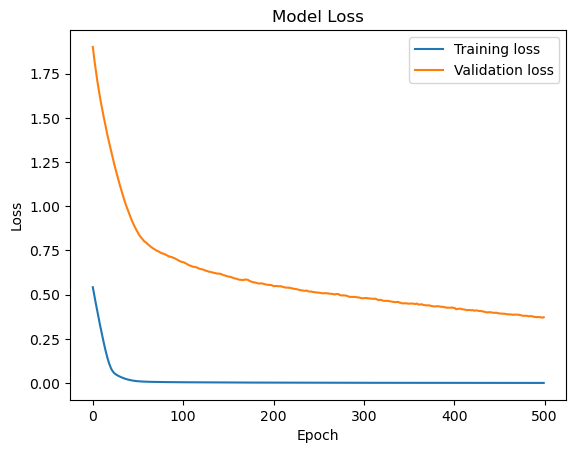

8/8 [==============================] - 0s 1ms/step


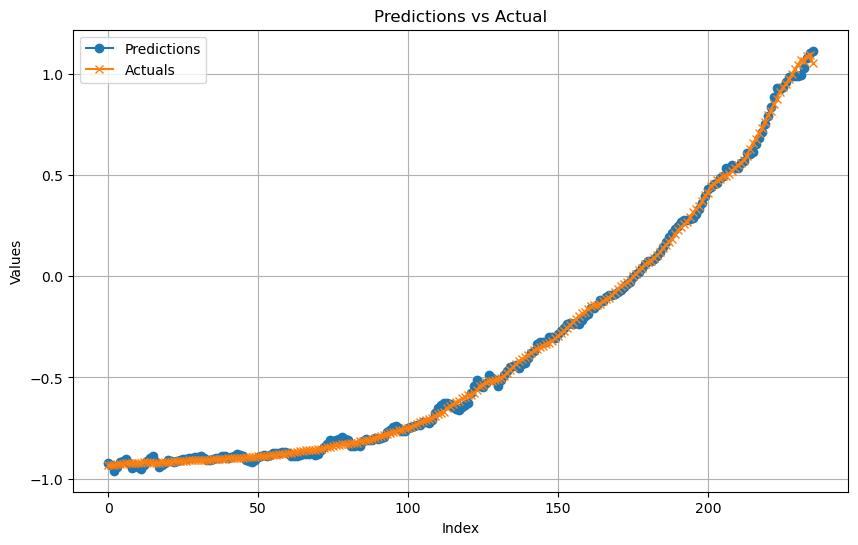

In [309]:
import tensorflow as tf
# Set a seed value
seed_value = 10
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
economic_war_data=pd.read_csv('../../data/war_economic_data.csv')
economic_war_data=economic_war_data[:-1]
economic_data_scaled=preprocess_data(economic_war_data)
n_future = 1   # Number of quarters to look into the future based on past quarters
n_past = 12    # Number of past quarters to use for predicting the future
train_data, val_data, test_data = train_data_split(economic_data_scaled, n_future, n_past)
# Access the split data
X_test, y_test = test_data
model=create_model(num_nodes = 12, window = n_past, features = 11, learning_rate = 0.0001)
train_model_and_plot(model=model, is_early_stopping=False, train_data=train_data, val_data=val_data, epochs=500)
predict_and_plot_vs_actual(model,data=train_data)

1/1 [==============================] - 0s 17ms/step


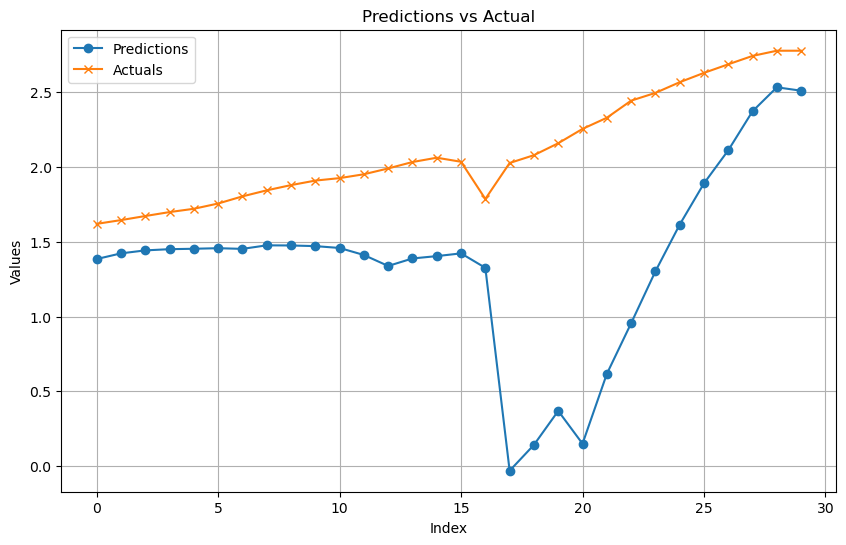

In [311]:
predict_and_plot_vs_actual(model,data=test_data)

### Adding War As Variable

In [326]:
economic_war_data=pd.read_csv('../../data/war_economic_data.csv')
economic_war_data=economic_war_data[:-1]
economic_war_scaled_data=preprocess_data(economic_war_data)
# Time periods for different wars
war_periods = {
    "Korean War": ("1950-06-25", "1953-07-27"),
    "Vietnam War": ("1965-03-08", "1975-04-30"),
    "Persian Gulf War": ("1990-08-02", "1991-02-28"),
    "War in Afghanistan": ("2001-10-07", "2021-08-30"),
    "Iraq War": ("2003-03-20", "2011-12-18"),
    "Russia Ukraine War": ("2022-02-24", "2023-09-30")  # Assuming "till now" is April 2023
}

# Initialize 'war' column to 0
economic_war_scaled_data['war'] = 0

# Mark periods of war in the 'war' column
for start, end in war_periods.values():
    economic_war_scaled_data.loc[economic_war_scaled_data.index.to_series().between(start, end), 'war'] = 1
economic_war_scaled_data.tail()

,Consumer Price Index,UNRATE,Personal Savings,Inflation Rate,Gross Domestic Product,Personal Consumption Expenditures,Gross Savings,Gross saving as a percentage of gross national income,Gross domestic investment,Net saving as a percentage of gross national income,FEDFUNDS,war
Quarter,,,,,,,,,,,,
2022-09-30,2.112847,-1.263162,0.550923,1.465472,2.629704,2.612971,2.705956,-0.828366,2.635085,-1.193906,-0.673947,1
2022-12-31,2.125765,-1.243532,0.571950,1.076603,2.687062,2.659851,2.547469,-1.148872,2.704302,-1.452130,-0.264568,1
2023-03-31,2.162662,-1.302421,1.269998,0.666715,2.743232,2.730857,2.428604,-1.429314,2.674250,-1.684531,-0.023044,1
2023-06-30,2.205205,-1.263162,1.466933,0.088667,2.777806,2.760943,2.452377,-1.429314,2.730477,-1.684531,0.109375,1
2023-09-30,2.236488,-1.184643,0.902915,-0.047962,2.777806,2.824438,2.452377,-1.429314,2.821151,-1.684531,0.184909,1


### Train And Model Predict In Presence Of War

train_size =  236
val_size =  29
test_size =  30
train_size =  (236, 12, 11)
val_size =  (29, 12, 11)
test_size =  (30, 12, 11)
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              (None, 12)                1152      
                                                                 
 dense_49 (Dense)            (None, 1)                 13        
                                                                 
Total params: 1,165
Trainable params: 1,165
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
8/8 [==============================] - 1s 18ms/step - loss: 0.3294 - val_loss: 2.6324
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 0.3125 - val_loss: 2.5061
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 0.2968 - val_loss: 2.3866
Epoch 4/500
8/8 [==========

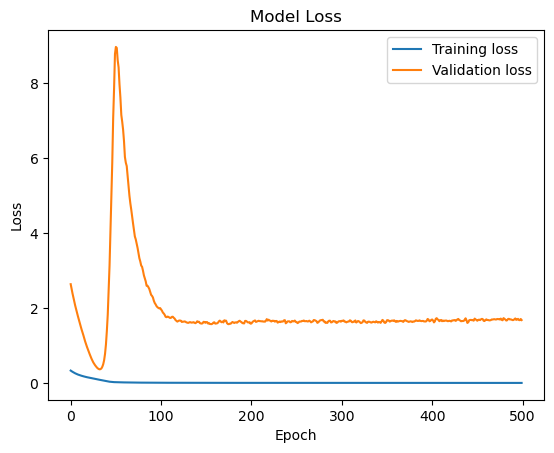

8/8 [==============================] - 0s 1ms/step


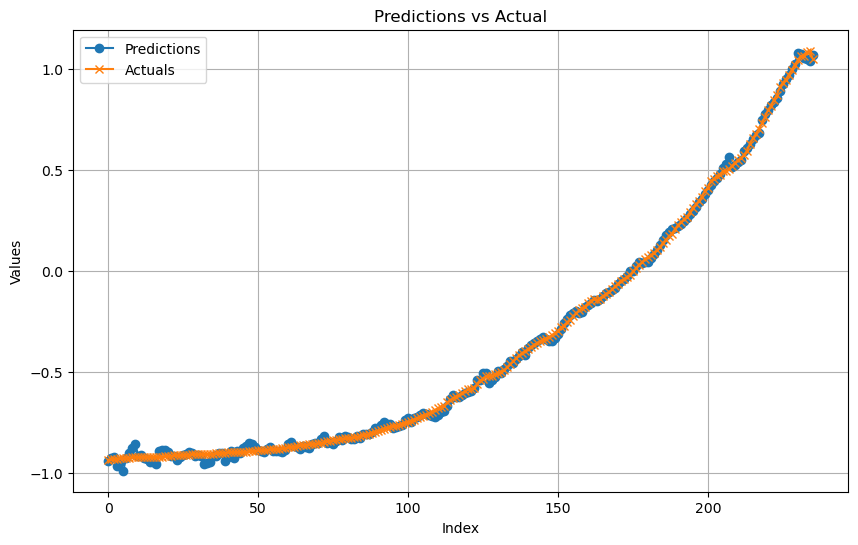

In [327]:
n_future = 1   # Number of quarters to look into the future based on past quarters
n_past = 12    # Number of past quarters to use for predicting the future
train_data, val_data, test_data = train_data_split(economic_war_scaled_data, n_future, n_past)
# Access the split data
X_test, y_test = test_data
model=create_model(num_nodes = 12, window = n_past, features = 11, learning_rate = 0.0001)
train_model_and_plot(model=model, is_early_stopping=False, train_data=train_data, val_data=val_data, epochs=500)
predict_and_plot_vs_actual(model,data=train_data)

1/1 [==============================] - 0s 16ms/step


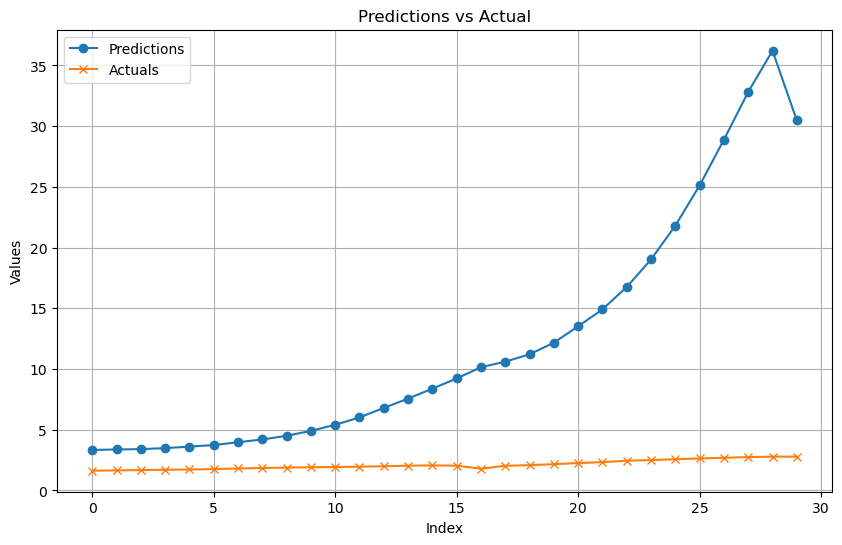

In [328]:
predict_and_plot_vs_actual(model,data=test_data)

### In Absence Of War 

In [329]:
economic_data=pd.read_csv('../../data/war_economic_data.csv')
economic_data=economic_data[:-1]
scaled_economic_no_war_df=preprocess_data(economic_data)
#forcefully setting war as 0
scaled_economic_no_war_df['war'] = 0
scaled_economic_no_war_df.tail(5)

,Consumer Price Index,UNRATE,Personal Savings,Inflation Rate,Gross Domestic Product,Personal Consumption Expenditures,Gross Savings,Gross saving as a percentage of gross national income,Gross domestic investment,Net saving as a percentage of gross national income,FEDFUNDS,war
Quarter,,,,,,,,,,,,
2022-09-30,2.112847,-1.263162,0.550923,1.465472,2.629704,2.612971,2.705956,-0.828366,2.635085,-1.193906,-0.673947,0
2022-12-31,2.125765,-1.243532,0.571950,1.076603,2.687062,2.659851,2.547469,-1.148872,2.704302,-1.452130,-0.264568,0
2023-03-31,2.162662,-1.302421,1.269998,0.666715,2.743232,2.730857,2.428604,-1.429314,2.674250,-1.684531,-0.023044,0
2023-06-30,2.205205,-1.263162,1.466933,0.088667,2.777806,2.760943,2.452377,-1.429314,2.730477,-1.684531,0.109375,0
2023-09-30,2.236488,-1.184643,0.902915,-0.047962,2.777806,2.824438,2.452377,-1.429314,2.821151,-1.684531,0.184909,0


train_size =  236
val_size =  29
test_size =  30
train_size =  (236, 12, 11)
val_size =  (29, 12, 11)
test_size =  (30, 12, 11)
Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_52 (LSTM)              (None, 12)                1152      
                                                                 
 dense_50 (Dense)            (None, 1)                 13        
                                                                 
Total params: 1,165
Trainable params: 1,165
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
8/8 [==============================] - 1s 18ms/step - loss: 1.4516 - val_loss: 0.3062
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 1.3779 - val_loss: 0.3174
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 1.3105 - val_loss: 0.3270
Epoch 4/500
8/8 [==========

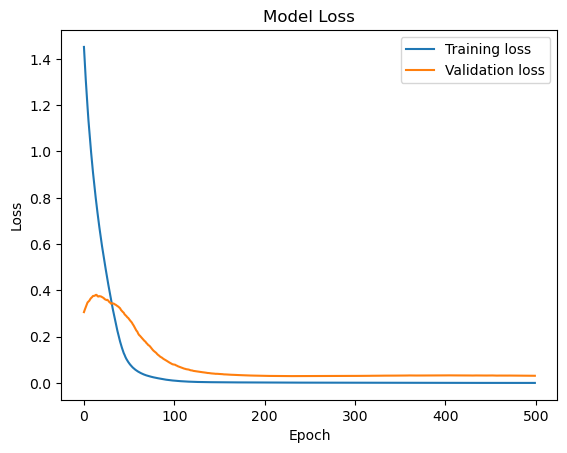

8/8 [==============================] - 0s 1ms/step


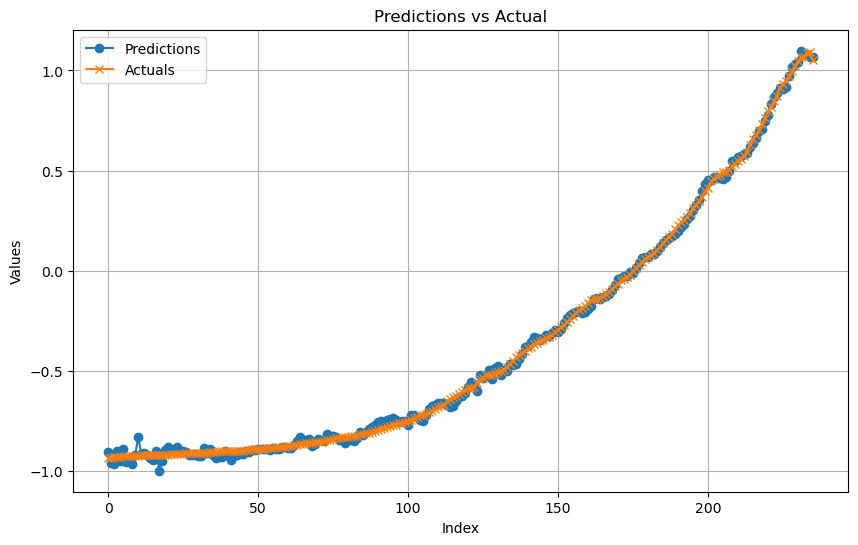

In [330]:
n_future = 1   # Number of quarters to look into the future based on past quarters
n_past = 12    # Number of past quarters to use for predicting the future
train_data, val_data, test_data = train_data_split(scaled_economic_no_war_df, n_future, n_past)
# Access the split data
X_test, y_test = test_data
model=create_model(num_nodes = 12, window = n_past, features = 11, learning_rate = 0.0001)
train_model_and_plot(model=model, is_early_stopping=False, train_data=train_data, val_data=val_data, epochs=500)
predict_and_plot_vs_actual(model,data=train_data)

1/1 [==============================] - 0s 17ms/step


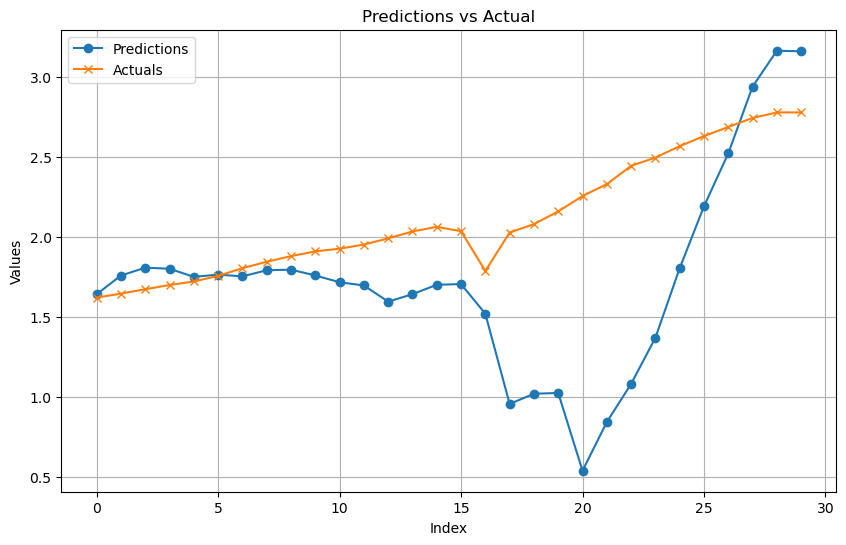

In [331]:
predict_and_plot_vs_actual(model,data=test_data)